In [1]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD


In [2]:
min_lat = 32
max_lat = 36
min_lon = -120
max_lon = -114


In [3]:
snapshots = np.load('E:/Save_location/3array.npy')




print(snapshots.shape)


(12, 100, 200)


In [4]:
npoints_lat = np.shape(snapshots)[1]
npoints_lon = np.shape(snapshots)[2]

In [5]:
x1grid, x2grid = np.mgrid[min_lat:max_lat:complex(0,npoints_lat), min_lon:max_lon:complex(0,npoints_lon)]

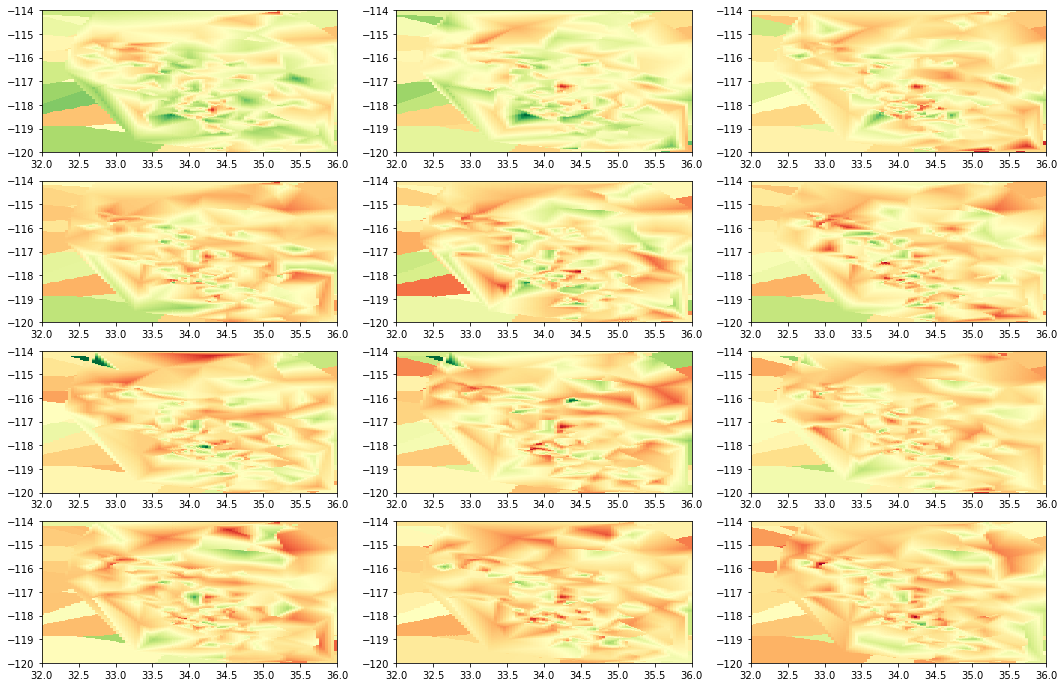

In [6]:
fig = plt.figure(figsize=(18,12))
for id_subplot, snapshot in enumerate(snapshots, start=1):
    plt.subplot(4, 3, id_subplot)
    plt.pcolor(x1grid, x2grid, snapshot.real,cmap='RdYlGn', vmin=-.07, vmax=.08)

plt.show()

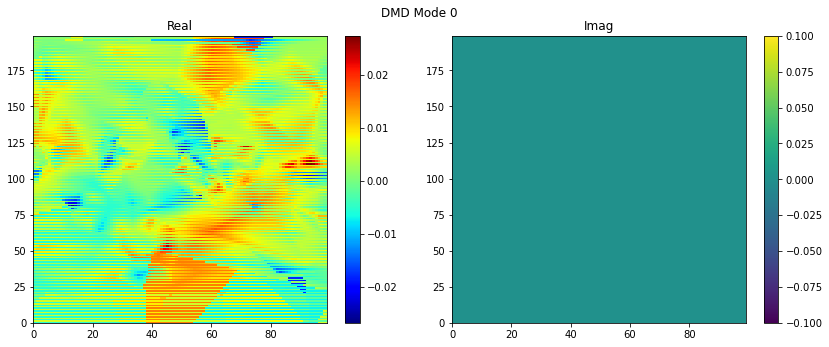

In [7]:
dmd = DMD(svd_rank=1, tlsq_rank=2, exact=True, opt=True)
dmd.fit(snapshots)
dmd.plot_modes_2D(figsize=(12,5))

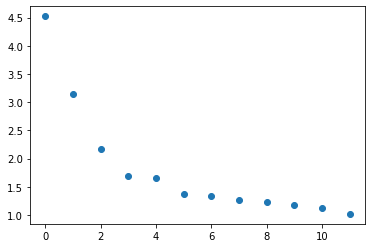

In [8]:
fig = plt.plot(scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in snapshots]).T), 'o')
plt.show()

In [9]:
print("Shape before manipulation: {}".format(dmd.reconstructed_data.shape))
dmd.dmd_time['dt'] *= .25
dmd.dmd_time['tend'] *= 3
print("Shape after manipulation: {}".format(dmd.reconstructed_data.shape))

Shape before manipulation: (20000, 12)
Shape after manipulation: (20000, 133)


In [ ]:
# Using this with uncompressed data is very slow

fig = plt.figure()

dmd_states = [state.reshape(x1grid.shape) for state in dmd.reconstructed_data.T]

frames = [
    [plt.pcolor(x1grid, x2grid, state.real, cmap='RdYlGn', vmin=-.07, vmax=.06)]
    for state in dmd_states
]

ani = animation.ArtistAnimation(fig, frames, interval=70, blit=False, repeat=False)

HTML(ani.to_html5_video())

In [11]:
dmd_states = [state.reshape(x1grid.shape) for state in dmd.reconstructed_data.T]

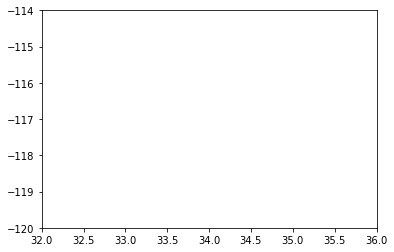

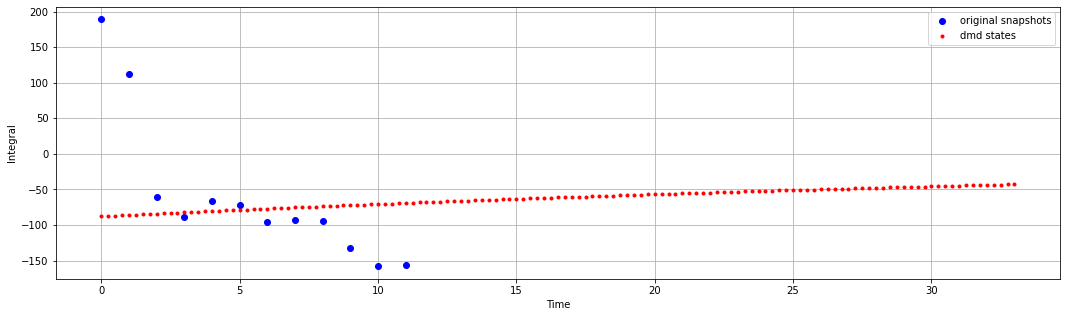

In [12]:
compute_integral = scipy.integrate.trapz

original_int = [compute_integral(compute_integral(snapshot)).real for snapshot in snapshots]
dmd_int = [compute_integral(compute_integral(state)).real for state in dmd_states]

figure = plt.figure(figsize=(18, 5))
plt.plot(dmd.original_timesteps, original_int, 'bo', label='original snapshots')
plt.plot(dmd.dmd_timesteps, dmd_int, 'r.', label='dmd states')
plt.ylabel('Integral')
plt.xlabel('Time')
plt.grid()
leg = plt.legend()

plt.show()